In [1]:
import numpy as np
import pandas as pd

In [2]:
meta_df = pd.read_csv("jan_train.csv")
meta_df.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,2014-01-01 00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2014-01-01 00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,2014-01-01 01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,2014-01-01 02:20:09.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,2014-01-01 03:06:52.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [3]:
meta_df.shape

(503227, 15)

In [4]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503227 entries, 0 to 503226
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      503227 non-null  int64  
 1   epoch   503227 non-null  object 
 2   sat_id  503227 non-null  int64  
 3   x       503227 non-null  float64
 4   y       503227 non-null  float64
 5   z       503227 non-null  float64
 6   Vx      503227 non-null  float64
 7   Vy      503227 non-null  float64
 8   Vz      503227 non-null  float64
 9   x_sim   503227 non-null  float64
 10  y_sim   503227 non-null  float64
 11  z_sim   503227 non-null  float64
 12  Vx_sim  503227 non-null  float64
 13  Vy_sim  503227 non-null  float64
 14  Vz_sim  503227 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 57.6+ MB


In [5]:
meta_df["epoch"] = pd.to_datetime(meta_df["epoch"])

## SAT-0 Analysis

In [6]:
filt = (meta_df["sat_id"]==0)
sat0_df = meta_df.loc[filt]

In [7]:
sat0_df.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,2014-01-01 00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2014-01-01 00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,2014-01-01 01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,2014-01-01 02:20:09.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,2014-01-01 03:06:52.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [8]:
sat0_df = sat0_df[["epoch", "x", "y", "z"]]

In [9]:
sat0_df.head(10)

,epoch,x,y,z
0,2014-01-01 00:00:00.000,-8855.823863,13117.780146,-20728.353233
1,2014-01-01 00:46:43.000,-10567.672384,1619.746066,-24451.813271
2,2014-01-01 01:33:26.001,-10578.684043,-10180.467460,-24238.280949
3,2014-01-01 02:20:09.001,-9148.251857,-20651.437460,-20720.381279
4,2014-01-01 03:06:52.002,-6719.092336,-28929.061629,-14938.907967
5,2014-01-01 03:53:35.002,-3708.453525,-34767.115528,-7863.224747
6,2014-01-01 04:40:18.003,-437.699227,-38249.612548,-234.351187
7,2014-01-01 05:27:01.003,2863.147037,-39594.503233,7420.538280
8,2014-01-01 06:13:44.004,6031.593902,-39056.319613,14731.102545
9,2014-01-01 07:00:27.004,8950.655291,-36886.362968,21432.111677


Text(0.5, 0.92, 'Satellite Tragectory')

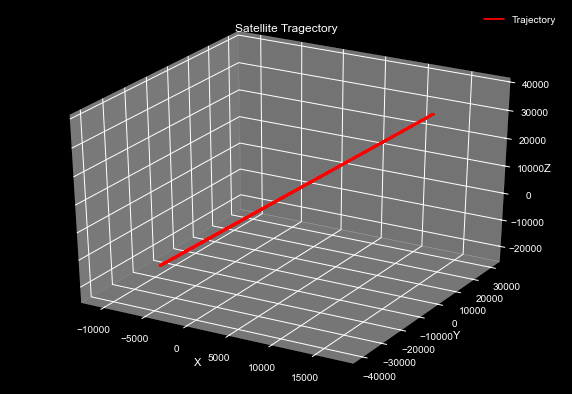

In [75]:
from matplotlib import pyplot as plt
#from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import axes3d
%matplotlib qt
plt.style.use("dark_background")
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.plot(sat0_df["x"], sat0_df["y"], sat0_df["z"], color = "red", label="Trajectory")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

plt.title("Satellite Tragectory")


In [13]:
sat0_df.tail(10)

,epoch,x,y,z
731,2014-01-24 16:23:10.363,11133.121927,-33859.313721,26747.171975
732,2014-01-24 17:09:53.364,13379.880052,-29243.225228,31775.931674
733,2014-01-24 17:56:36.364,15173.743957,-23635.665058,35728.949880
734,2014-01-24 18:43:19.365,16461.691880,-17239.921573,38490.581501
735,2014-01-24 19:30:02.365,17194.282667,-10263.631730,39953.578881
736,2014-01-24 20:16:45.366,17323.752275,-2929.599994,40015.054282
737,2014-01-24 21:03:28.366,16803.492692,4510.550397,38575.720092
738,2014-01-24 21:50:11.367,15589.464016,11758.599852,35543.718040
739,2014-01-24 22:36:54.367,13644.957424,18446.405418,30846.351215
740,2014-01-24 23:23:37.368,10951.688066,24106.659914,24456.597220


In [14]:
sat0_df['epoch'].max() - sat0_df['epoch'].min()

Timedelta('23 days 23:23:37.368000')

In [15]:
data = sat0_df[["x", "y", "z"]]
data.shape

(741, 3)

In [16]:
# total data of 24 days
# set train data of 20days
# reaminng 4 days for prediction/forecasting

#### Split data into train and test

In [17]:
data = np.array(data)

In [18]:
data[0]

array([ -8855.8238626 ,  13117.78014618, -20728.35323298])

In [19]:
len(data)

741

In [20]:
train = data[:371]
test = data[371:]

In [21]:
len(train) + len(test)

741

In [22]:
train.shape, test.shape

((371, 3), (370, 3))

#### Scale the data

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
#Sequence size has an impact on prediction
seq_size = 20  ## number of steps (lookback)
n_features = 3 ## number of features. (x, y and z)
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length = seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(train_scaled)) # 521
print("Total number of samples in the generated data = ", len(train_generator)) # 501 with seq_size=20

Total number of samples in the original training data =  371
Total number of samples in the generated data =  351


In [28]:
x, y =train_generator[0]

In [29]:
x, y

(array([[[6.41722221e-02, 7.58692356e-01, 5.77184386e-02],
         [2.92735477e-03, 5.93261579e-01, 0.00000000e+00],
         [2.53339022e-03, 4.23483121e-01, 3.31002672e-03],
         [5.37100150e-02, 2.72829479e-01, 5.78420142e-02],
         [1.40618144e-01, 1.53733137e-01, 1.47462316e-01],
         [2.48329880e-01, 6.97367084e-02, 2.57144543e-01],
         [3.65347776e-01, 1.96314308e-02, 3.75401934e-01],
         [4.83442274e-01, 2.81487169e-04, 4.94062605e-01],
         [5.96799914e-01, 8.02473563e-03, 6.07385791e-01],
         [7.01235280e-01, 3.92455176e-02, 7.11260086e-01],
         [7.93616106e-01, 9.05528982e-02, 8.02623812e-01],
         [8.71473592e-01, 1.58786017e-01, 8.79074666e-01],
         [9.32743566e-01, 2.40945128e-01, 9.38612029e-01],
         [9.75595474e-01, 3.34087022e-01, 9.79467998e-01],
         [9.98322297e-01, 4.35195288e-01, 1.00000000e+00],
         [9.99279135e-01, 5.41021585e-01, 9.98632762e-01],
         [9.76872866e-01, 6.47885288e-01, 9.73852343e-01

In [30]:
#Also generate test data
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(test_scaled)) 
print("Total number of samples in the generated data = ", len(test_generator)) 

Total number of samples in the original training data =  370
Total number of samples in the generated data =  350


#### Build a neural network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [32]:
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(3))

model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 150)           92400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 151,795
Trainable params: 151,795
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit_generator(train_generator, 
                              validation_data=test_generator, 
                              epochs=50, steps_per_epoch=10)

C:\Users\adity\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 [==============================] - 5s 193ms/step - loss: 0.1819 - val_loss: 0.2105
Epoch 2/50
10/10 [==============================] - 1s 150ms/step - loss: 0.2168 - val_loss: 0.1648
Epoch 3/50
10/10 [==============================] - 1s 128ms/step - loss: 0.1953 - val_loss: 0.1368
Epoch 4/50
10/10 [==============================] - 1s 128ms/step - loss: 0.1107 - val_loss: 0.1010
Epoch 5/50
10/10 [==============================] - 1s 129ms/step - loss: 0.0937 - val_loss: 0.0777
Epoch 6/50
10/10 [==============================] - 1s 124ms/step - loss: 0.0649 - val_loss: 0.0526
Epoch 7/50
10/10 [==============================] - 1s 126ms/step - loss: 0.0404 - val_loss: 0.0609
Epoch 8/50
10/10 [==============================] - 1s 131ms/step - loss: 0.0810 - val_loss: 0.0500
Epoch 9/50
10/10 [==============================] - 1s 135ms/step - loss: 0.0342 - val_loss: 0.0352
Epoch 10/50
10/10 [==============================] - 1s 143ms/step - loss: 0.0376 - val_loss: 0.0263

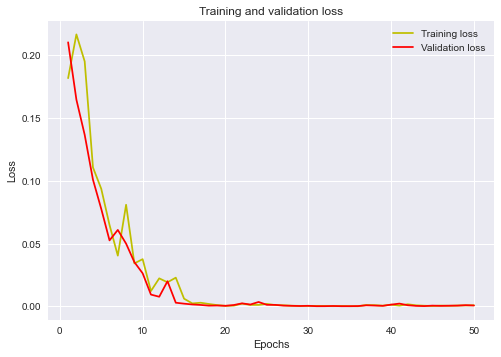

In [38]:
#plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.style.use("seaborn")
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
%matplotlib inline

#### Predictions

In [39]:
test_predictions = model.predict(test_generator)

In [40]:
test_predictions = scaler.inverse_transform(test_predictions)

In [41]:
type(test_predictions)

numpy.ndarray

In [42]:
test_predictions

array([[  -527.33777, -36838.625  ,   -140.44067],
       [  2794.722  , -37999.81   ,   7594.961  ],
       [  5994.5503 , -37142.246  ,  15096.323  ],
       ...,
       [ 16067.626  ,  16146.238  ,  36359.363  ],
       [ 13837.179  ,  22765.402  ,  31339.275  ],
       [ 10764.316  ,  28120.32   ,  24300.506  ]], dtype=float32)

In [43]:
train.shape, test.shape

((371, 3), (370, 3))

In [44]:
column_names = ["X", "Y", "Z"]
# creating the dataframe
df = pd.DataFrame(data = train, columns = column_names)

In [45]:
df.head()

,X,Y,Z
0,-8855.823863,13117.780146,-20728.353233
1,-10567.672384,1619.746066,-24451.813271
2,-10578.684043,-10180.467460,-24238.280949
3,-9148.251857,-20651.437460,-20720.381279
4,-6719.092336,-28929.061629,-14938.907967


In [46]:
columns = ["PredX", "PredY", "PredZ"]
# creating the dataframe
df_pred = pd.DataFrame(data = test_predictions, columns = columns)

In [47]:
df_pred.head()

,PredX,PredY,PredZ
0,-527.337769,-36838.625000,-140.440674
1,2794.721924,-37999.808594,7594.960938
2,5994.550293,-37142.246094,15096.323242
3,8861.881836,-34829.457031,21942.708984
4,11423.527344,-31057.597656,27978.414062


Text(0.5, 0.92, 'Satellite Tragectory')

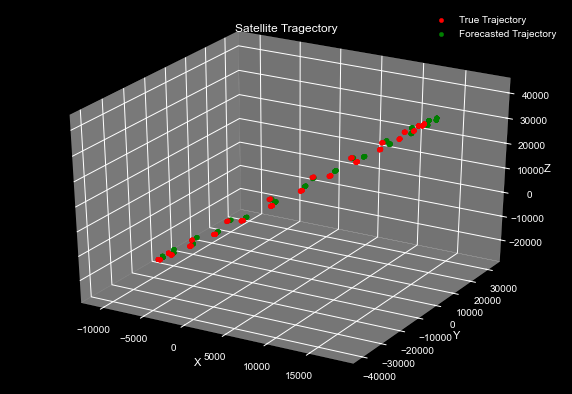

In [74]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

#plt.style.use("seaborn")
plt.style.use('dark_background')

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
#ax.plot(sat0_df["x"], sat0_df["y"], sat0_df["z"], color = "green")
ax.scatter3D(df["X"], df["Y"], df["Z"], color = "red", label="True Trajectory")
ax.scatter3D(df_pred["PredX"], df_pred["PredY"], df_pred["PredZ"], color="green", label="Forecasted Trajectory")
#ax.plt(test_predictions)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.title("Satellite Tragectory")


Text(0.5, 0.92, 'Satellite Tragectory')

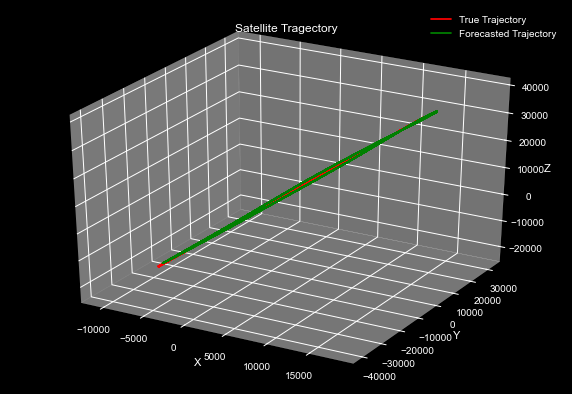

In [73]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

#plt.style.use("seaborn")
plt.style.use('dark_background')

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
#ax.plot(sat0_df["x"], sat0_df["y"], sat0_df["z"], color = "green")
ax.plot(df["X"], df["Y"], df["Z"], color = "red", label="True Trajectory")
ax.plot(df_pred["PredX"], df_pred["PredY"], df_pred["PredZ"], color="green", label="Forecasted Trajectory")
#ax.plt(test_predictions)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.title("Satellite Tragectory")

